### **Load libraries**

In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import risk_kit as rk
import importlib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### **Load data**

In [4]:
rets = pd.read_csv('selected_stocks_rets.csv', index_col=0)
stocks = pd.read_csv('selected_stocks_stocks.csv', index_col=0)

In [5]:
expected_returns = pd.read_csv('expected_returns.csv', index_col=0, header=None).iloc[:,0]
expected_covmat = pd.read_csv('expected_covmat.csv', index_col=0)

In [6]:
# Define the number of periods per year for all calculations
# 252 is an approximation for daily
# 54 for weekly
# 12 for monthly
periods_per_year = 54

# **Initial examination**

In [8]:
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BOGOTA.CL,0.024069,0.278244,-0.814815,13.052103,0.061719,0.097131,0.086502,-0.633000
BVC.CL,0.123627,0.255840,0.703288,7.033831,0.044391,0.069545,0.483222,-0.356135
CELSIA.CL,0.179886,0.276537,2.478082,24.799438,0.010755,0.070047,0.650495,-0.476794
CEMARGOS.CL,0.067447,0.392848,2.611661,40.681833,-0.001824,0.103420,0.171688,-0.782276
CIBEST.CL,0.197636,0.355399,0.236484,15.611857,0.059418,0.097414,0.556097,-0.581655
CONCONCRET.CL,-0.078862,1.087382,15.787182,324.087742,-2.076697,0.140517,-0.072525,-0.864859
CORFICOLCF.CL,-0.009080,0.290810,0.063563,8.064312,0.059714,0.092212,-0.031222,-0.600359
ECOPETROL.CL,0.144183,0.390194,-0.234699,9.278061,0.080166,0.114029,0.369517,-0.598050
ENKA.CL,0.081194,0.396284,1.923321,14.255068,0.040403,0.099697,0.204889,-0.562287
EXITO.CL,0.060238,0.340378,1.194267,12.683294,0.048044,0.096864,0.176974,-0.659980


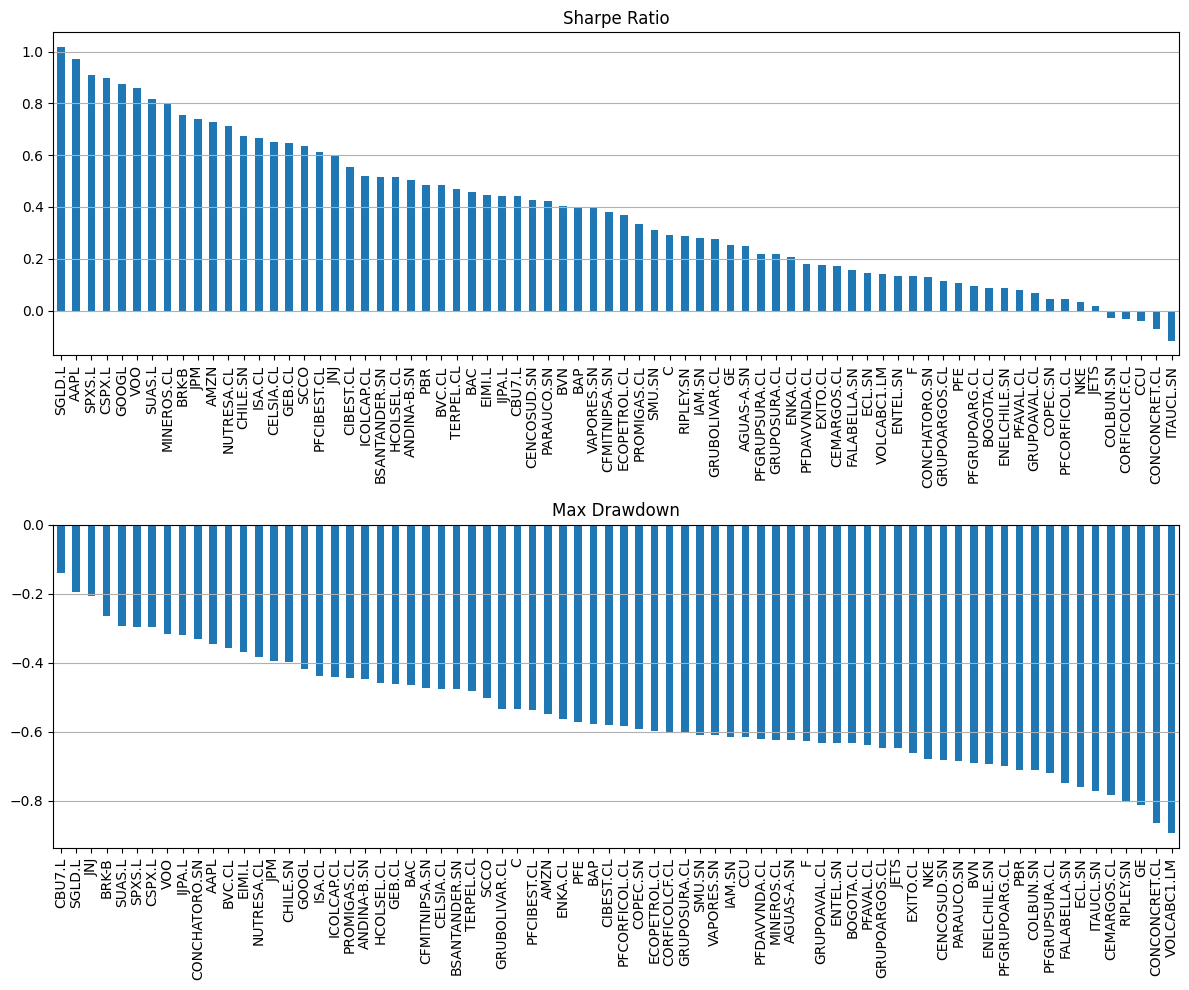

In [9]:
# Plot some return, volatility, and risk rankings to get a view of relevant stocks
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year)
#plot1_series = summary_stats['Annualized Return'].sort_values(ascending=False)
#plot2_series = summary_stats['Annualized Volatility'].sort_values(ascending=True)
#plot1_series = summary_stats['Cornish-Fisher VaR (5%)'].sort_values(ascending=False)
#plot2_series = summary_stats['Historic CVaR (5%)'].sort_values(ascending=False)
plot1_series = summary_stats['Sharpe Ratio'].sort_values(ascending=False)
plot2_series = summary_stats['Max Drawdown'].sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot1_series.plot.bar(ax = axes[0], legend=False, title=plot1_series.name)
plot2_series.plot.bar(ax=axes[1], legend=False, title=plot2_series.name)
axes[0].grid(axis='y')
axes[1].grid(axis='y')
plt.tight_layout()

In [10]:
# Identify stock pairs with very high correlation

# Generate correlation matrix
corr_mat = rets.corr()
# Generate a mask to exclude  duplicated pairs
#mask = np.triu(np.ones_like(corr_mat))
#corr_mat = corr_mat*mask
# Convert the matrix into a dataframe structured as a list of pairs with their respective correlations
stack_corr = pd.DataFrame(corr_mat.stack())
stack_corr = stack_corr[stack_corr[0] < 1]
stack_corr = stack_corr[stack_corr[0] != 0]
stack_corr.index.names = ['Stock 1', 'Stock 2']
stack_corr.reset_index(inplace=True)
#(abs(stack_corr[0]) > .7).sum()

# Filter to visualize only the pairs with very high correlations
high_corrs = stack_corr[stack_corr[0] >= 0.8].sort_values(by=0, ascending=False)
high_corrs

,Stock 1,Stock 2,0
5083,SPXS.L,CSPX.L,0.999058
3426,CSPX.L,SPXS.L,0.999058
5179,SUAS.L,SPXS.L,0.952473
5106,SPXS.L,SUAS.L,0.952473
5156,SUAS.L,CSPX.L,0.952239
3427,CSPX.L,SUAS.L,0.952239
5375,VOO,CSPX.L,0.924027
3430,CSPX.L,VOO,0.924027
5398,VOO,SPXS.L,0.922554
5109,SPXS.L,VOO,0.922554


In [11]:
# Check the average correlation coefficient of each stock
stack_corr.groupby('Stock 1')[0].mean().sort_values(ascending=False)

Stock 1
ICOLCAP.CL       0.346547
VOO              0.344502
CFMITNIPSA.SN    0.340575
SPXS.L           0.340036
CSPX.L           0.339966
SUAS.L           0.322537
EIMI.L           0.316614
C                0.310083
HCOLSEL.CL       0.305213
JETS             0.299701
PFCIBEST.CL      0.289150
JPM              0.281199
CIBEST.CL        0.280371
BAC              0.275832
PFGRUPSURA.CL    0.273558
BRK-B            0.273556
PFAVAL.CL        0.270015
COPEC.SN         0.266833
IJPA.L           0.265879
ITAUCL.SN        0.261894
PARAUCO.SN       0.257566
ECOPETROL.CL     0.255688
CCU              0.248694
PFDAVVNDA.CL     0.248658
F                0.246970
GE               0.243240
SCCO             0.243178
CEMARGOS.CL      0.236772
CENCOSUD.SN      0.236247
FALABELLA.SN     0.234228
BAP              0.230517
BSANTANDER.SN    0.227054
NKE              0.226691
PBR              0.224669
GRUPOARGOS.CL    0.222496
CORFICOLCF.CL    0.222115
PFGRUPOARG.CL    0.216745
ISA.CL           0.211162
RIPL

# **Identify Combination with the maximum Sharpe-Ratio**

In [12]:
# Based on historical returns
n_periods = 162
# returns = rk.summary_stats(rets.iloc[-n_periods:], periods_per_year=periods_per_year)['Annualized Return']
# covmat = rets.iloc[-n_periods:].cov()

# Based on predicted returns
returns = expected_returns
covmat = expected_covmat

In [21]:
# Loop that calculates the combination that maximizes the Sharpe ratio several times until no stock has less than 5% of weight
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%
max_weight = 0.3 # The maximum weight allowed for a stock
min_weight = .05 # The minimum weight allowed for a stock
initial_weights = rk.msr_tuned(riskfree_rate=rf_rate,
                         returns=returns,
                         covmat=covmat,
                         max_weight=max_weight,
                         periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=initial_weights, index=returns.index, columns=['Weights']).sort_values(by='Weights')

while optimal_allocation.min().values < min_weight:
    optimal_allocation = optimal_allocation[1:]
    weights = rk.msr_tuned(riskfree_rate=rf_rate,
                     returns=returns[optimal_allocation.index],
                     covmat=covmat.loc[optimal_allocation.index, optimal_allocation.index],
                     max_weight=max_weight,
                     periods_per_year=periods_per_year)
    optimal_allocation = pd.DataFrame(data=weights, index=optimal_allocation.index, columns=['Weights']).sort_values(by='Weights')

chosen_allocation = optimal_allocation
chosen_allocation

C:\Python projects\Finance\lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
C:\Python projects\Finance\lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
C:\Python projects\Finance\lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
C:\Python projects\Finance\lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
C:\Python projects\Finance\lib\site-packages\scipy\optimize\_slsqp_py.py:495: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])
C:\Python

,Weights
0,
ENKA.CL,0.066056
CEMARGOS.CL,0.075325
SGLD.L,0.078219
C,0.086348
CCU,0.177278
GOOGL,0.216774
ICOLCAP.CL,0.300000


In [22]:
"""
# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%

weights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])
optimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]

# Reduce the portfolio stocks to only those for which shares of over 3% is recommended
chosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]
chosen_allocation = chosen_allocation / chosen_allocation.sum()
chosen_allocation.sort_values(by='Weights')
"""

"\n# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%\nrf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%\n\nweights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)\noptimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])\noptimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]\n\n# Reduce the portfolio stocks to only those for which shares of over 3% is recommended\nchosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]\nchosen_allocation = chosen_allocation / chosen_allocation.sum()\nchosen_allocation.sort_values(by='Weights')\n"

<Axes: xlabel='Date'>

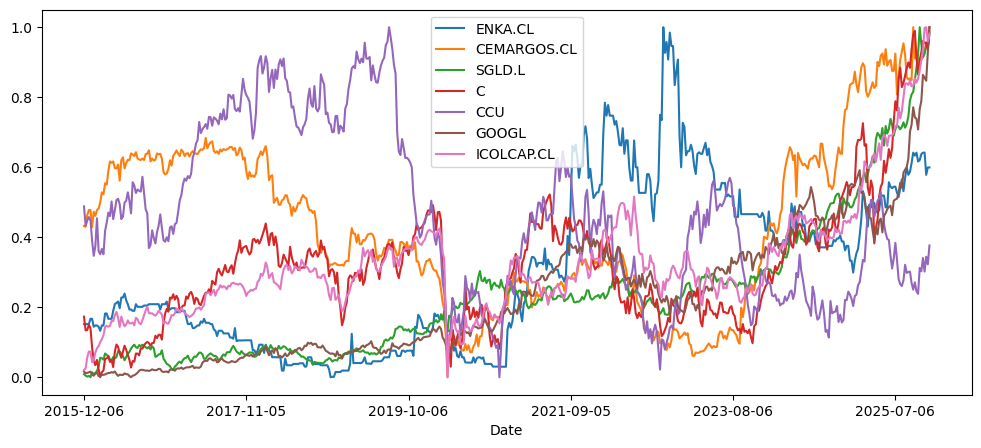

In [33]:
normalized_stocks = (stocks - stocks.min()) / (stocks.max() - stocks.min())
normalized_stocks[optimal_allocation.index].plot(figsize=(12, 5))

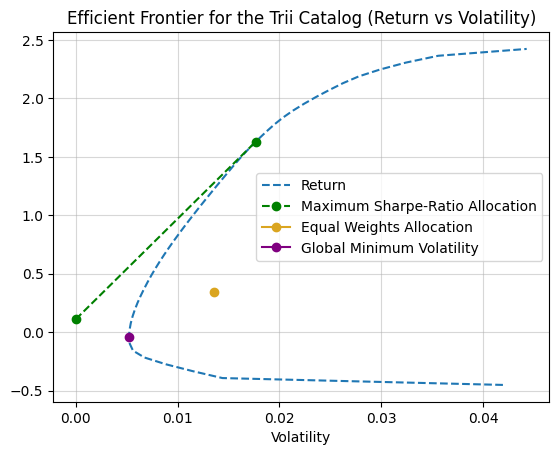

In [34]:
rk.plot_ef(50, style='--', show_cml=True, show_ew=True, show_gmv=True, riskfree_rate=rf_rate,
           returns=returns, covmat=covmat, periods_per_year=periods_per_year)
plt.title('Efficient Frontier for the Trii Catalog (Return vs Volatility)')
plt.grid(alpha=.5)

# **Create an index for the chosen allocation**

In [35]:
# Generate a dataframe to represent the evolution of the allocation in each stock
weights = chosen_allocation['Weights']
allocated_index = (rets[weights.index] + 1).cumprod()*weights

# Add a column to represent the index
allocated_index['index'] = allocated_index.sum(axis='columns')
allocated_index.index = pd.to_datetime(allocated_index.index.str.split('/').str[0])

# Generate a row to represent an earlier period before returns are made,
# corresponding to the time when the index equal 1
first_period = allocated_index.index[0]
starting_period = first_period - pd.offsets.Week(weekday=6)   # Uncomment to generate a week starting period
#starting_period = first_period - pd.offsets.DateOffset(months=1)   # Uncomment to generate a month starting period
starting_period

allocation_start = pd.DataFrame(index=[starting_period], columns=allocated_index.columns)
allocation_start.iloc[:, :-1] = 1*weights
allocation_start['index'] = 1

# Append the row to the allocated_index dataframe
allocated_index = pd.concat([allocation_start, allocated_index], axis='rows')
allocated_index.head()

,ENKA.CL,CEMARGOS.CL,SGLD.L,C,CCU,GOOGL,ICOLCAP.CL,index
2015-12-06,0.066056,0.075325,0.078219,0.086348,0.177278,0.216774,0.3,1.000000
2015-12-13,0.066056,0.075075,0.077314,0.08011,0.168517,0.208765,0.302499,0.978336
2015-12-20,0.066056,0.079071,0.076658,0.080267,0.170727,0.210554,0.319141,1.002472
2015-12-27,0.066056,0.080902,0.077152,0.082618,0.172385,0.213055,0.32813,1.020296
2016-01-03,0.068572,0.080902,0.076262,0.081113,0.170964,0.21644,0.32813,1.022383


In [40]:
# Generate a dataframe with the returns of the index
allocated_index_returns = (allocated_index/allocated_index.shift(1) - 1).dropna()
allocated_index_returns.tail()

,ENKA.CL,CEMARGOS.CL,SGLD.L,C,CCU,GOOGL,ICOLCAP.CL,index
2025-11-02,0.004785,0.007812,-0.029223,0.024803,0.041162,0.081833,0.020675,0.044287
2025-11-09,0.0,0.011628,0.007898,-0.004347,-0.04031,-0.008393,0.043363,0.005373
2025-11-16,-0.071429,0.024904,0.020198,0.001072,0.046042,-0.008679,0.00122,-0.002103
2025-11-23,0.025641,-0.005608,-0.005298,-0.015952,-0.022394,0.084114,-0.026066,0.031223
2025-11-30,0.0,0.024178,0.032926,0.049645,0.056872,0.068478,0.014782,0.046535


In [37]:
summary_stats = rk.summary_stats(allocated_index_returns, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
ENKA.CL,0.081194,0.396284,1.923321,14.255068,0.040403,0.099697,0.204889,-0.562287
CEMARGOS.CL,0.067447,0.392848,2.611661,40.681833,-0.001824,0.103420,0.171688,-0.782276
SGLD.L,0.148310,0.145740,0.116183,4.986666,0.028406,0.039937,1.017637,-0.194443
C,0.100424,0.344900,-0.041699,7.932205,0.070202,0.105412,0.291169,-0.534781
CCU,-0.010926,0.281380,0.332534,4.634010,0.057496,0.076988,-0.038831,-0.616078
GOOGL,0.244865,0.279953,0.139641,3.782681,0.055750,0.074626,0.874665,-0.418639
ICOLCAP.CL,0.109199,0.209615,-0.647974,22.151768,0.038588,0.060527,0.520952,-0.440915
index,0.140815,0.168266,-0.760476,10.747988,0.036077,0.048481,0.836861,-0.353559


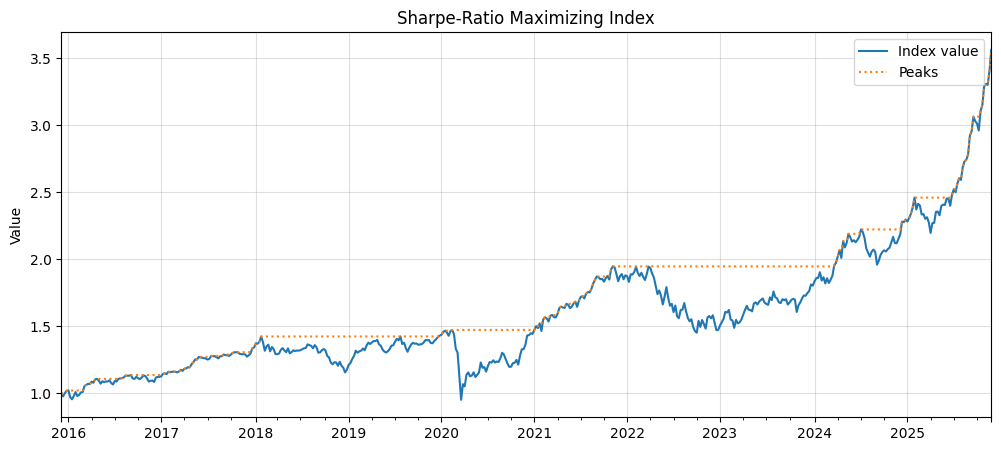

In [38]:
# Visualize the evolution of the index
allocated_index['index'].plot(figsize=(12, 5), label='Index value')
allocated_index['index'].cummax().plot(linestyle=':', label='Peaks')
plt.legend()
plt.ylabel('Value')
plt.title('Sharpe-Ratio Maximizing Index')
plt.grid(alpha=0.4)

### **Export datasets and an index for the Sharpe-Ratio maximizing allocation**

In [39]:
# Allocation index and returns
allocated_index.to_csv('allocated_index.csv')
allocated_index_returns.to_csv('allocated_index_returns.csv')